<a href="https://colab.research.google.com/github/TanayRvp19/PROJECTS/blob/main/forecasting_of_nifty50_price_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
from google.colab import files


uploaded = files.upload()


Saving NIFTY 50.csv to NIFTY 50.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving NIFTY BANK.csv to NIFTY BANK.csv


In [ ]:
nifty_50_df = pd.read_csv("NIFTY BANK.csv", index_col='Date', parse_dates=['Date'])
nifty_bank_df = pd.read_csv("NIFTY 50.csv", index_col='Date', parse_dates=['Date'])

nifty_50_df.head(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-01,NaN,NaN,NaN,1000.00,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,1054.81,NaN,NaN,11.40,1.27,2.31
2000-01-04,NaN,NaN,NaN,1092.08,NaN,NaN,11.80,1.32,2.23
2000-01-05,NaN,NaN,NaN,1055.99,NaN,NaN,11.41,1.27,2.31
2000-01-06,NaN,NaN,NaN,1086.67,NaN,NaN,11.74,1.31,2.24


In [ ]:
nifty_50_df.tail(5)

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2020-05-04,20514.75,20530.45,19643.60,19743.75,NaN,NaN,22.66,1.85,0.49
2020-05-05,20147.30,20223.15,19212.35,19271.75,381269938.0,9.095400e+10,22.12,1.80,0.50
2020-05-06,19302.45,19806.60,18941.00,19694.55,395557269.0,9.797350e+10,22.60,1.84,0.49
2020-05-07,19536.05,19757.25,19332.15,19491.80,300140979.0,7.706310e+10,22.37,1.82,0.50
2020-05-08,19844.00,19969.60,19285.05,19352.90,330610646.0,7.983740e+10,22.31,1.81,0.50


In [ ]:
nifty_50_df = nifty_50_df.fillna(method='ffill')
nifty_bank_df = nifty_bank_df.fillna(method='ffill')

In [ ]:
def plot_attribute(df, attritube ,start='2000', end='2020',color ='blue'):
    fig, ax = plt.subplots(1, figsize=(20,5))
    ax.plot(df[start:end].index, df[start:end][attritube],'tab:{}'.format(color))
    ax.set_title("Nifty stock {} from 2000 to 2020".format(attritube))
    
    ax.axhline(y=df[start:end].describe()[attritube]["max"],linewidth=2, color='m')
    ax.axhline(y=df[start:end].describe()[attritube]["min"],linewidth=2, color='c')
    ax.axvline(x=df[attritube].idxmax(),linewidth=2, color='b')
    ax.axvline(x=df[attritube].idxmin() ,linewidth=2, color='y')
    
    ax.text(x=df[attritube].idxmax(),
            y=df[start:end].describe()[attritube]["max"],
            s='MAX',
            horizontalalignment='right',
            verticalalignment='bottom',
            color='blue',
            fontsize=20)
    
    ax.text(x=df[attritube].idxmin(),
            y=df[start:end].describe()[attritube]["min"],
            s='MIN',
            horizontalalignment='left',
            verticalalignment='top',
            color='red',
            fontsize=20)
    
    plt.show()
    print("Max Value :  ",df[start:end].describe()[attritube]["max"])
    print("Min Value :  ",df[start:end].describe()[attritube]["min"])

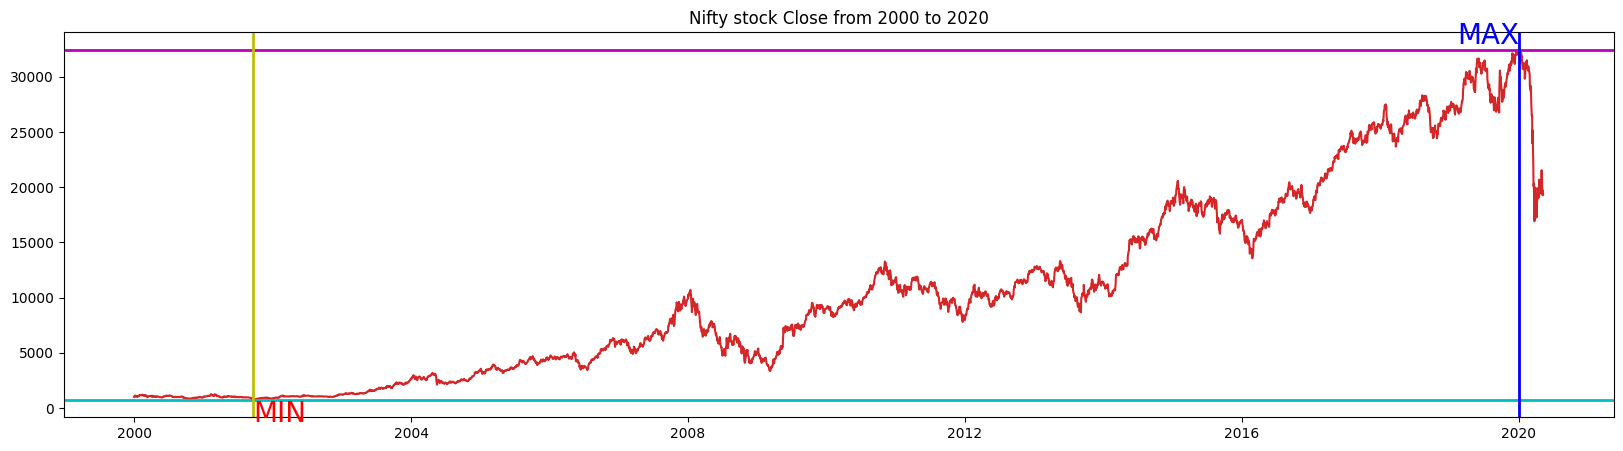

Max Value :   32443.85
Min Value :   743.7


In [ ]:
plot_attribute(nifty_50_df,"Close",color='red')

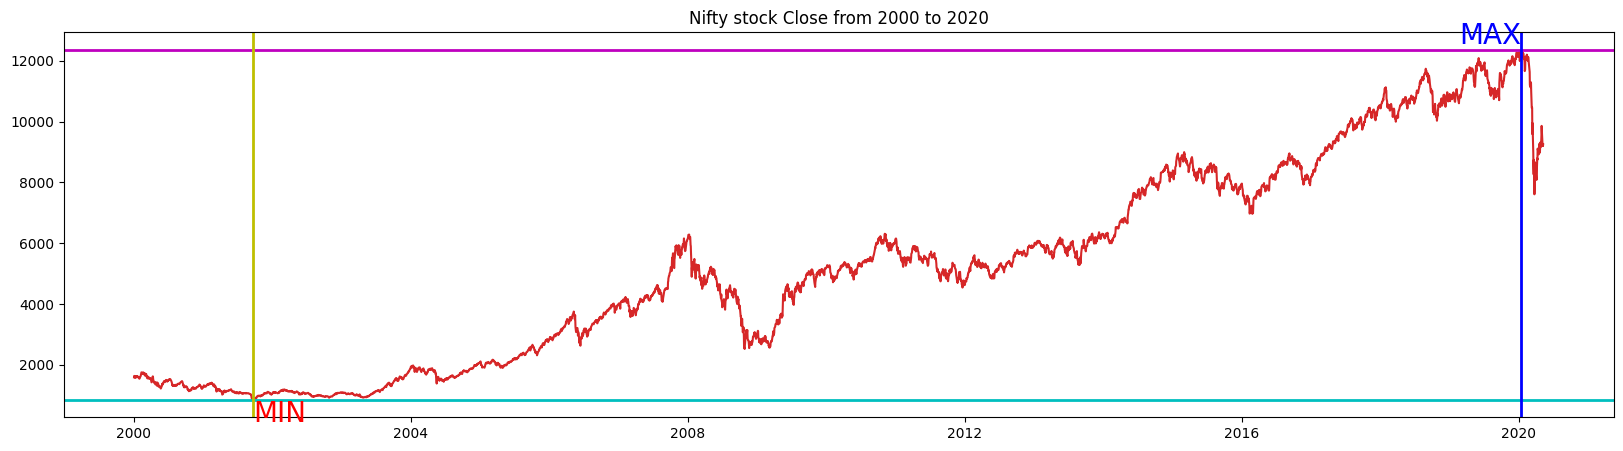

Max Value :   12362.3
Min Value :   854.2


In [ ]:
plot_attribute(nifty_bank_df,"Close",color='red')

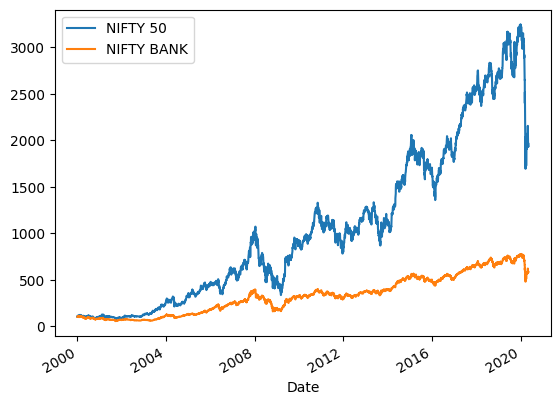

In [ ]:
#comaparing time series of nifty50 and niftybank
normalised_nifty_50_df = nifty_50_df["Close"].div(nifty_50_df["Close"].iloc[0]).mul(100)
normalised_nifty_bank_df = nifty_bank_df["Close"].div(nifty_bank_df['Close'].iloc[0]).mul(100)
normalised_nifty_50_df.plot()
normalised_nifty_bank_df.plot()
plt.legend(['NIFTY 50','NIFTY BANK'])
plt.show()

In [ ]:
#augmented dickey fuller test
#tests for trend non-stationary
#null hypothesis is that TS is non-stationary

dicky_fuller_result = adfuller(nifty_50_df['Close'])
dicky_fuller_result

(-1.0147477751645,
 0.7478474570875211,
 23,
 5038,
 {'1%': -3.4316486572066887,
  '5%': -2.8621138670088118,
  '10%': -2.5670754699409537},
 67545.36569931908)

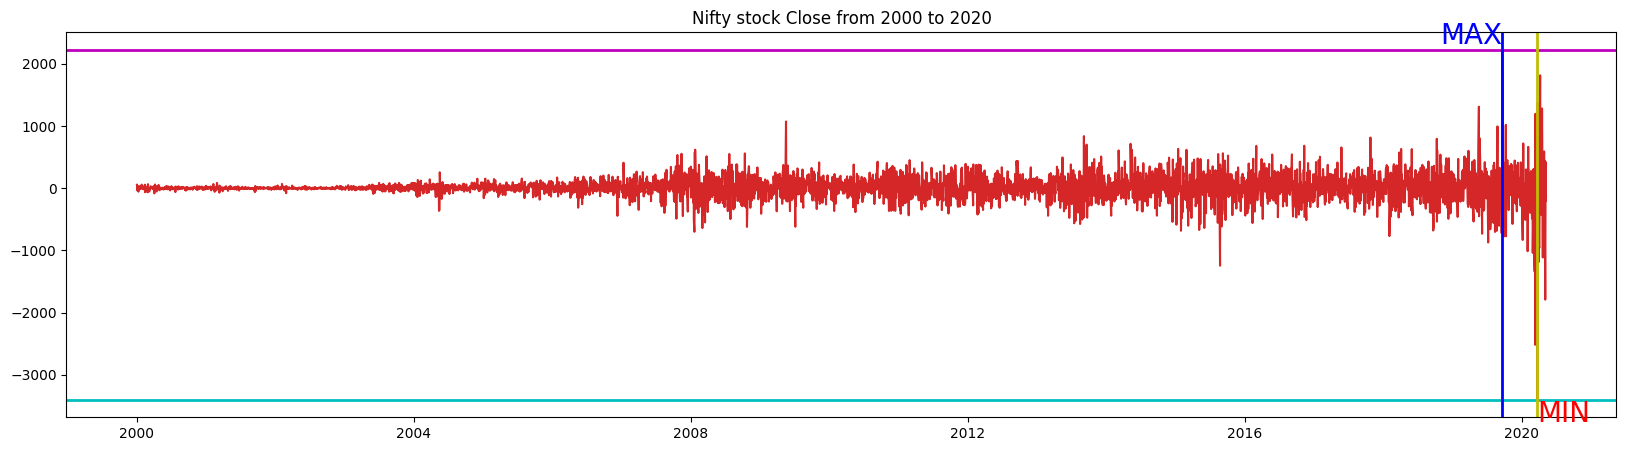

Max Value :   2223.899999999998
Min Value :   -3399.949999999997


In [ ]:
# as p-value s more than 0.05,the time series is non-stationary
plot_attribute(nifty_50_df.diff(),"Close",color='red')

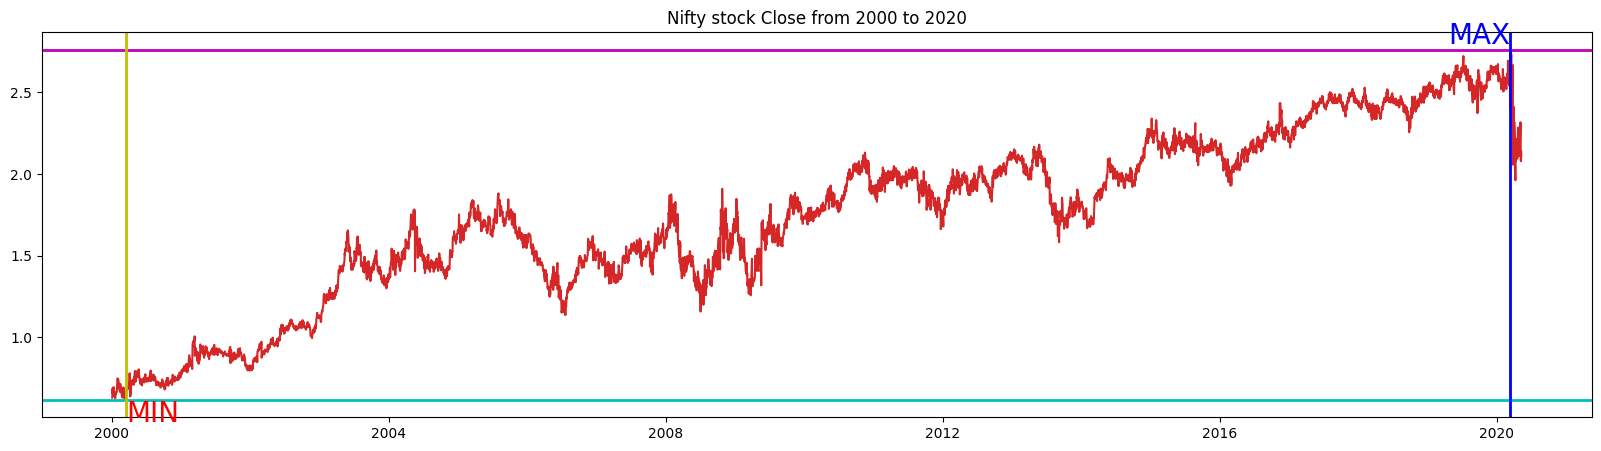

Max Value :   2.7619797396286816
Min Value :   0.6149990741312266


In [ ]:
plot_attribute(nifty_50_df.shift(1)/nifty_bank_df,"Close",color='red')

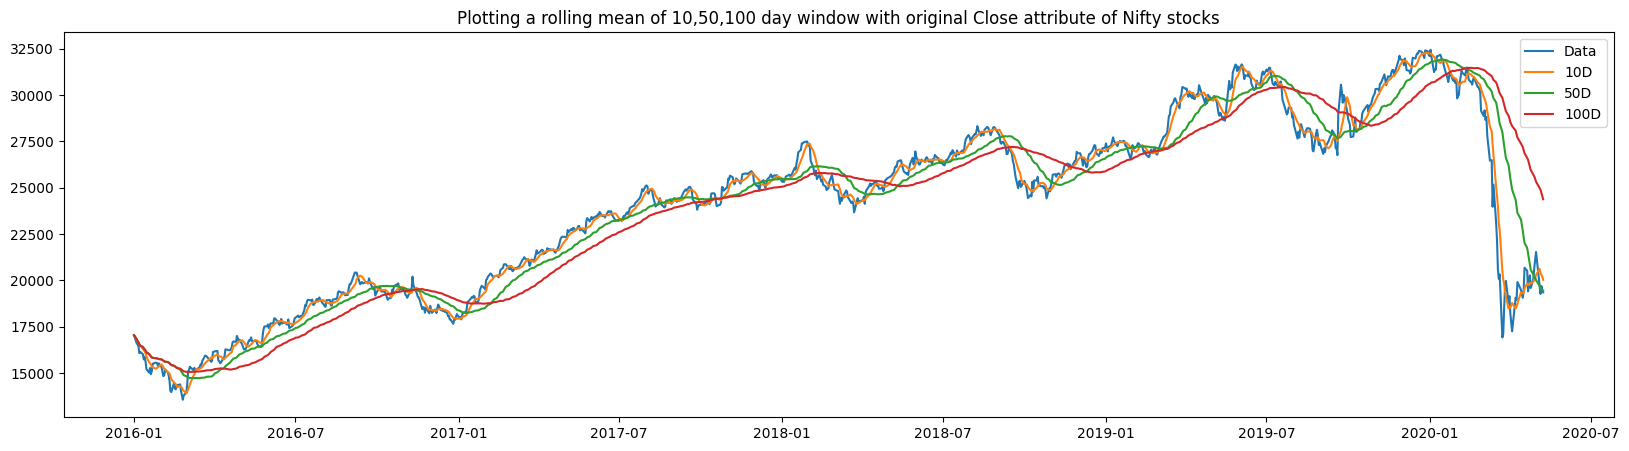

In [ ]:
some_part_of_data = nifty_50_df['2016':'2020']

rolling_nifty_50_df_10 = some_part_of_data['Close'].rolling('10D').mean()
rolling_nifty_50_df_50 = some_part_of_data['Close'].rolling('50D').mean()
rolling_nifty_50_df_100 = some_part_of_data['Close'].rolling('100D').mean()

fig, ax = plt.subplots(1, figsize=(20,5))
ax.plot(some_part_of_data.index,some_part_of_data['Close'])
ax.plot(rolling_nifty_50_df_10.index, rolling_nifty_50_df_10)
ax.plot(rolling_nifty_50_df_50.index, rolling_nifty_50_df_50)
ax.plot(rolling_nifty_50_df_100.index, rolling_nifty_50_df_100)
ax.set_title("Plotting a rolling mean of 10,50,100 day window with original Close attribute of Nifty stocks")
plt.legend(['Data','10D','50D','100D'])
plt.show()

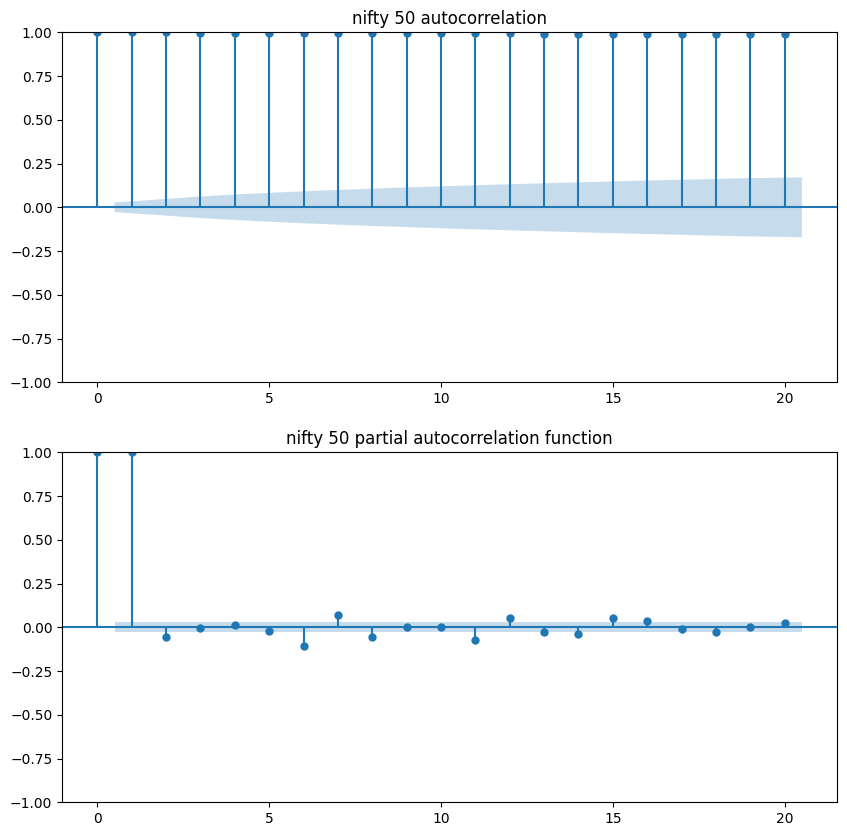

In [ ]:
plt.figure(figsize=(10,10))

# ACF of Nifty 50 close price
ax1 = plt.subplot(211)
plot_acf(nifty_50_df["Close"], lags="20",title="nifty 50 autocorrelation",ax=ax1)

# PACF of Nifty 50 close price
ax2 = plt.subplot(212)
plot_pacf(nifty_50_df["Close"], lags="20",title="nifty 50 partial autocorrelation function",ax=ax2)

plt.show()

In [46]:
#aic and bic model

train_data = nifty_50_df["Close"]["2017":"4-15-2019"]
test_data =  nifty_50_df["Close"]["4-15-2019":]

In [47]:
order_aic_bic =[] 
# Loop over AR order 
for p in range(6): 
    # Loop over MA order 
    for q in range(3): 
        # Fit model 
        for d in range(2):
            model = SARIMAX(train_data, order=(p,d,q)) 
            results = model.fit() 
            # Add order and scores to list 
            order_aic_bic.append((p,d, q, results.aic, results.bic))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been prov

In [48]:
order_df = pd.DataFrame(order_aic_bic, columns=['p','d','q', 'aic', 'bic'])
#short value by aic and get value of p d q
order_df.sort_values('aic')[:5]

,p,d,q,aic,bic
1,0,1,0,7700.781963,7705.120557
7,1,1,0,7701.507776,7710.184965
3,0,1,1,7701.582248,7710.259436
9,1,1,1,7701.886063,7714.901845
13,2,1,0,7703.017736,7716.033518


In [67]:
model = SARIMAX(train_data, order=(5,1,2)) 
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [50]:
mae = np.mean(np.abs(results.resid))
print(mae)

198.68829283358275


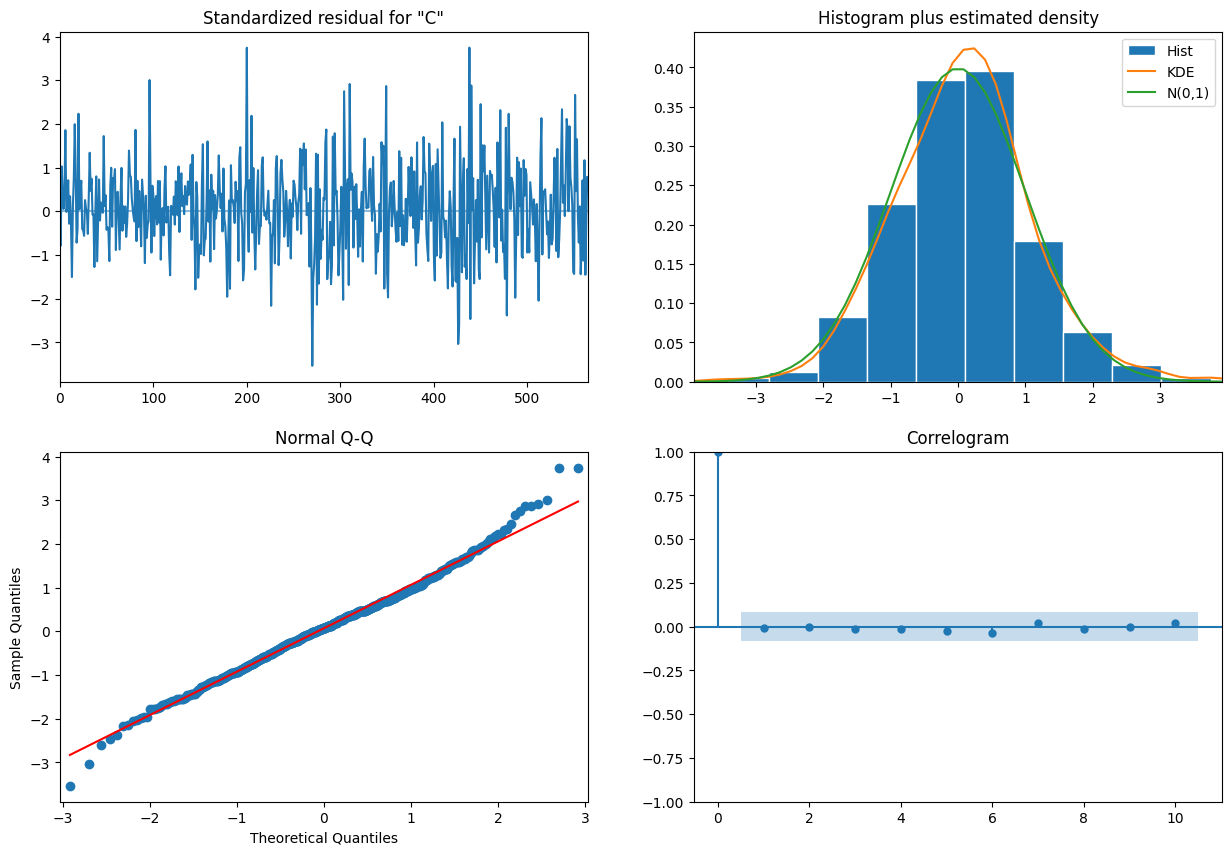

In [52]:
plt.rcParams["figure.figsize"] = (15,10)
results.plot_diagnostics() 
plt.show()

In [54]:
prediction = results.get_prediction(start="4-15-2019")

In [55]:
predictedmean = prediction.predicted_mean
p_bounds = prediction.conf_int()
p_lower_limit = p_bounds.iloc[:,0]
p_upper_limit = p_bounds.iloc[:,1]

In [56]:
forecast = results.get_forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [57]:
mean_forecast = forecast.predicted_mean
f_bounds = forecast.conf_int()
f_lower_limit = f_bounds.iloc[:,0]
f_upper_limit = f_bounds.iloc[:,1]

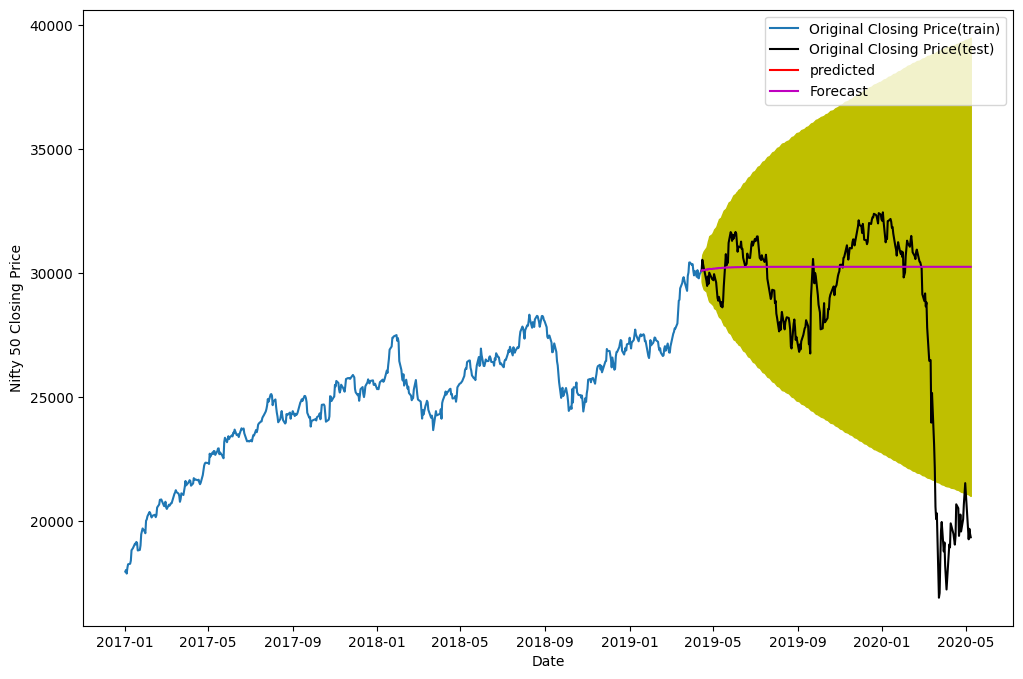

In [58]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data, label='Original Closing Price(train)')
plt.plot(test_data.index, test_data, label='Original Closing Price(test)',color='k')

plt.plot(predictedmean.index, predictedmean, color='r', label='predicted')
plt.plot(test_data.index, mean_forecast, color='m', label='Forecast')

plt.fill_between(predictedmean.index,p_lower_limit,p_upper_limit, color='yellow')
plt.fill_between(test_data.index,f_lower_limit,f_upper_limit, color='y')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

In [59]:
#lstm forecasting

import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [61]:
X = nifty_50_df.drop(["Close","Turnover","P/E","P/B","Div Yield"],axis=1)
y = nifty_50_df["Close"]

# Preprocessing
scaler = MinMaxScaler()
scaler_X = scaler.fit_transform(X)

X_df = pd.DataFrame(data=scaler_X, columns=["Open","High","Low","Volume"],index= X.index)
y_df = pd.DataFrame(data=y, columns=["Close"],index= y.index)

train_X_df = X_df["2000":"1-2-2020"]
test_X_df = X_df["1-2-2020":]

train_y_df = y_df["2000":"1-2-2020"]
test_y_df = y_df["1-2-2020":]

train_X = np.array(train_X_df)
test_X = np.array(test_X_df)

train_y = np.array(train_y_df)
test_y = np.array(test_y_df)

train_X = np.reshape(train_X,(train_X.shape[0],train_X.shape[1],1))
test_X = np.reshape(test_X,(test_X.shape[0],test_X.shape[1],1))

train_y = np.reshape(train_y,(train_y.shape[0],1))
test_y = np.reshape(test_y,(test_y.shape[0],1))

In [62]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

Train X shape :  (4977, 4, 1)
Test X shape :  (86, 4, 1)
Train y shape :  (4977, 1)
Test y shape :  (86, 1)


In [63]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(128,
                                 input_shape=(train_X.shape[1],1),
                                 activation='relu',
                                 return_sequences=True
                                ))

lstm_model.add(keras.layers.LSTM(64,return_sequences=False,activation='relu'))

lstm_model.add(keras.layers.Dense(32,activation='relu'))
lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [69]:
history = lstm_model.fit(train_X, train_y, batch_size=128,epochs=100, verbose=1, shuffle=False)

Epoch 1/100
39/39 [==============================] - 5s 23ms/step - loss: nan
Epoch 2/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 3/100
39/39 [==============================] - 1s 32ms/step - loss: nan
Epoch 4/100
39/39 [==============================] - 2s 42ms/step - loss: nan
Epoch 5/100
39/39 [==============================] - 1s 28ms/step - loss: nan
Epoch 6/100
39/39 [==============================] - 1s 24ms/step - loss: nan
Epoch 7/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 8/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 9/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 10/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 11/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 12/100
39/39 [==============================] - 1s 23ms/step - loss: nan
Epoch 13/100
39/39 [==============================] - 1s 23ms

In [70]:
prediction = lstm_model.predict(test_X)

3/3 [==============================] - 0s 6ms/step


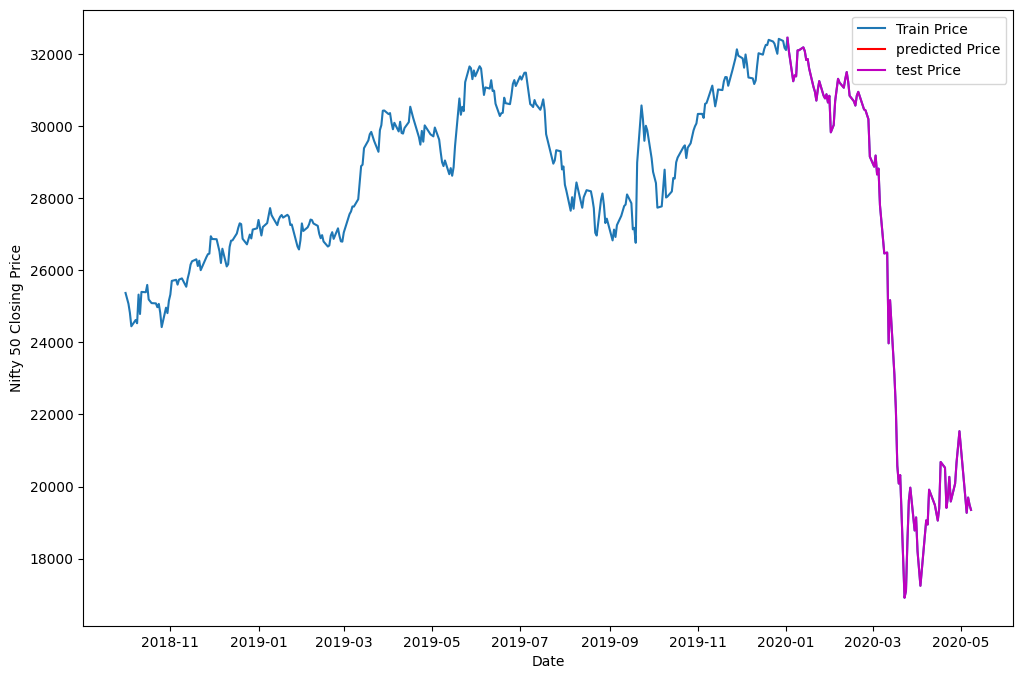

In [71]:
test_y_df["prediction"] = np.reshape(prediction,(prediction.shape[0]))

plt.figure(figsize=(12,8))

plt.plot(nifty_50_df["10-2018":].index,nifty_50_df["10-2018":]["Close"], label="Train Price")
plt.plot(test_y_df.index,test_y_df.prediction, label="predicted Price",color='r')
plt.plot(test_y_df.index,test_y_df.Close, label="test Price",color='m')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()